# Car Price Prediction in Poland using Supervised Machine Learning

## Import & Analyze Data

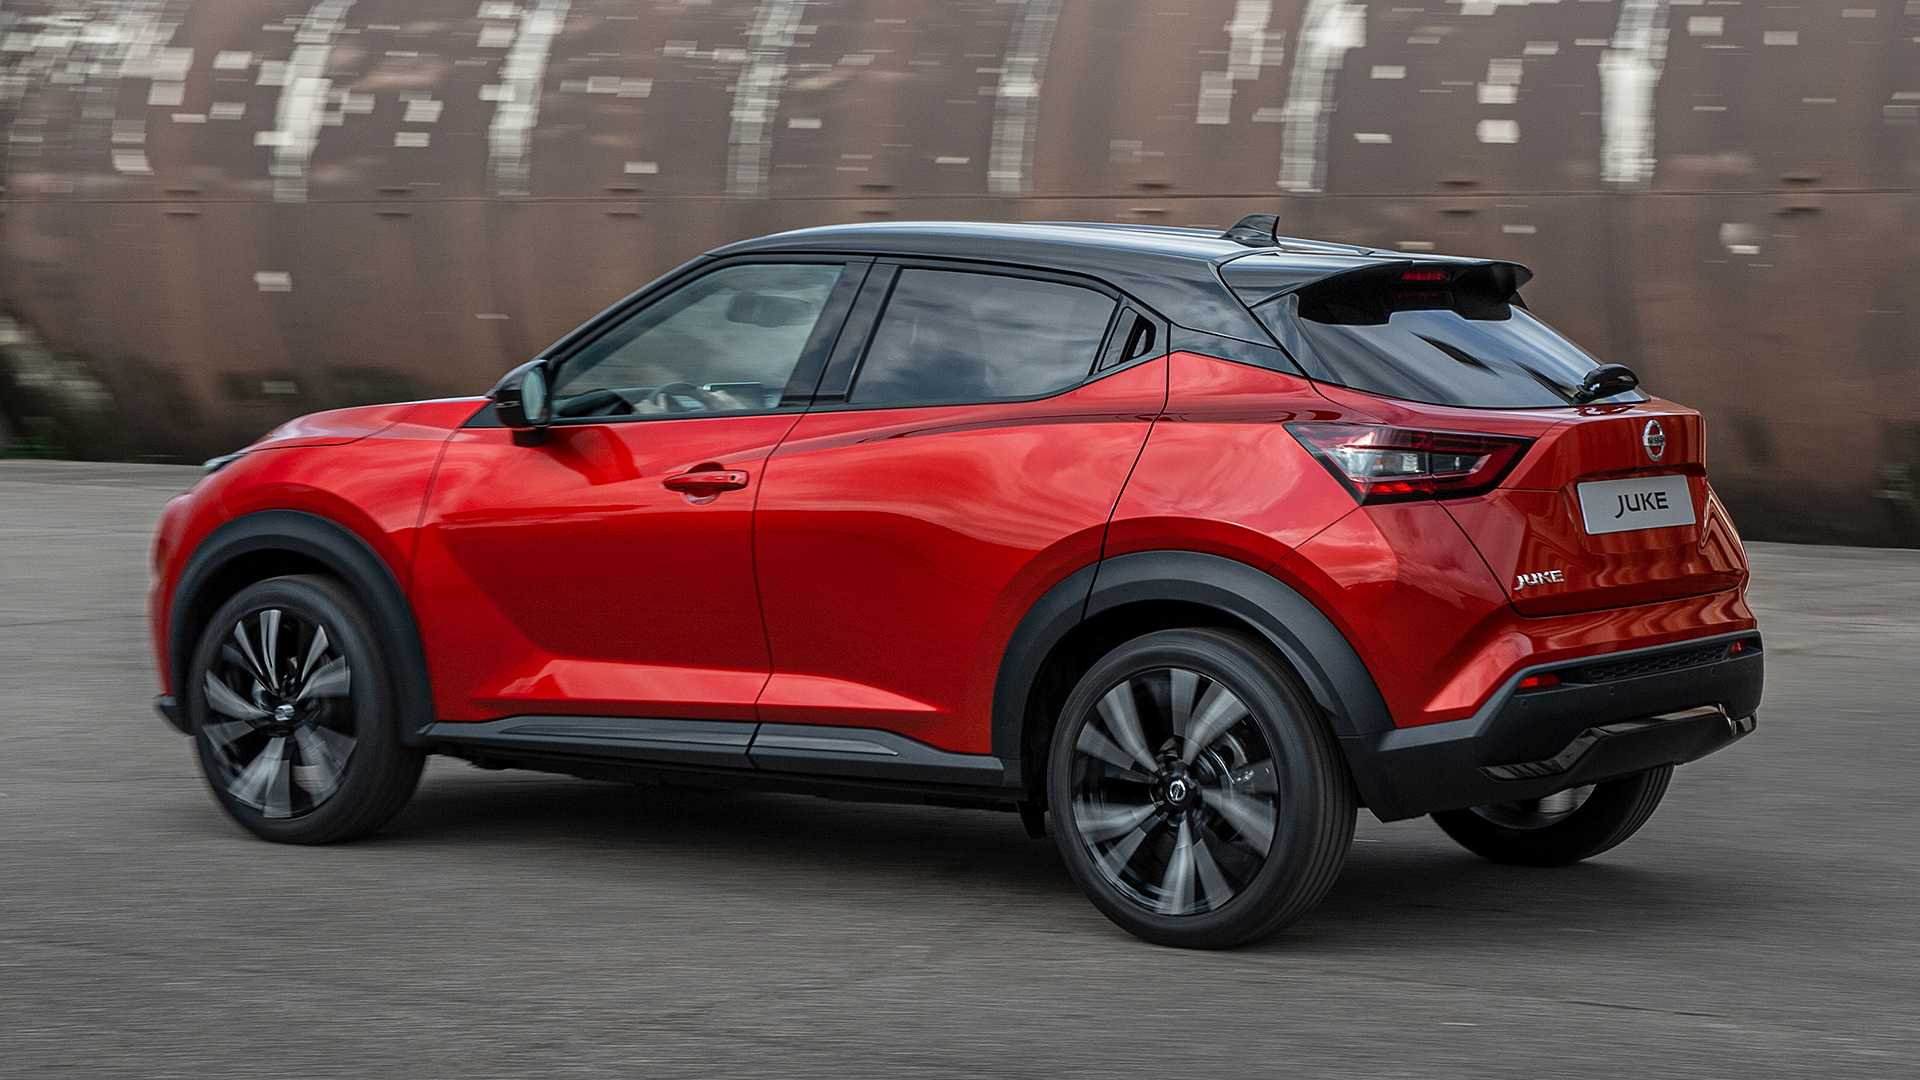

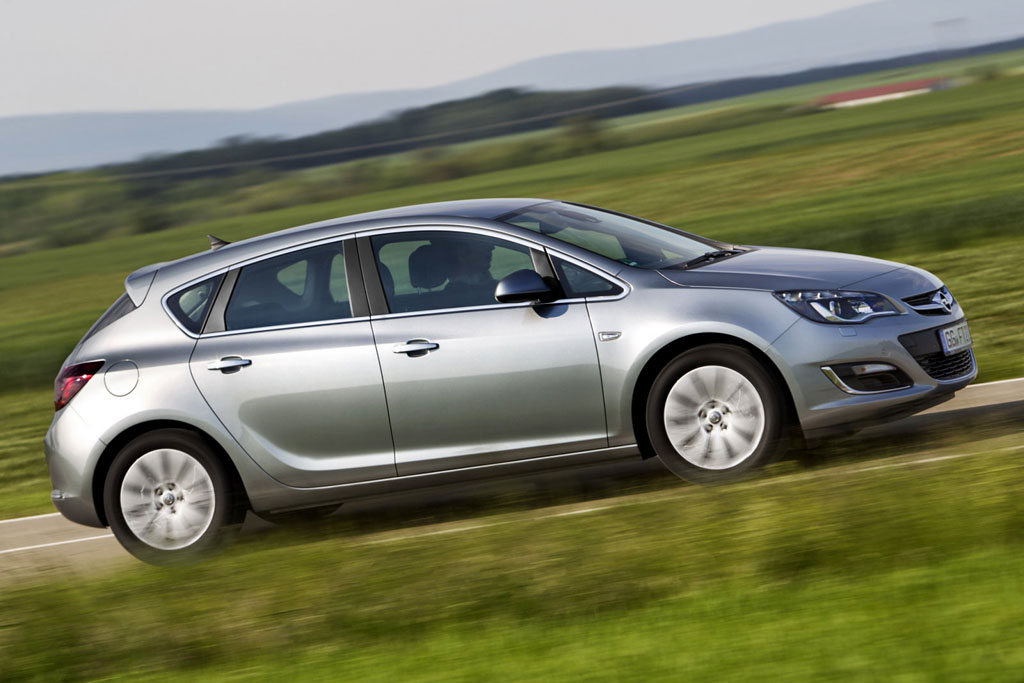

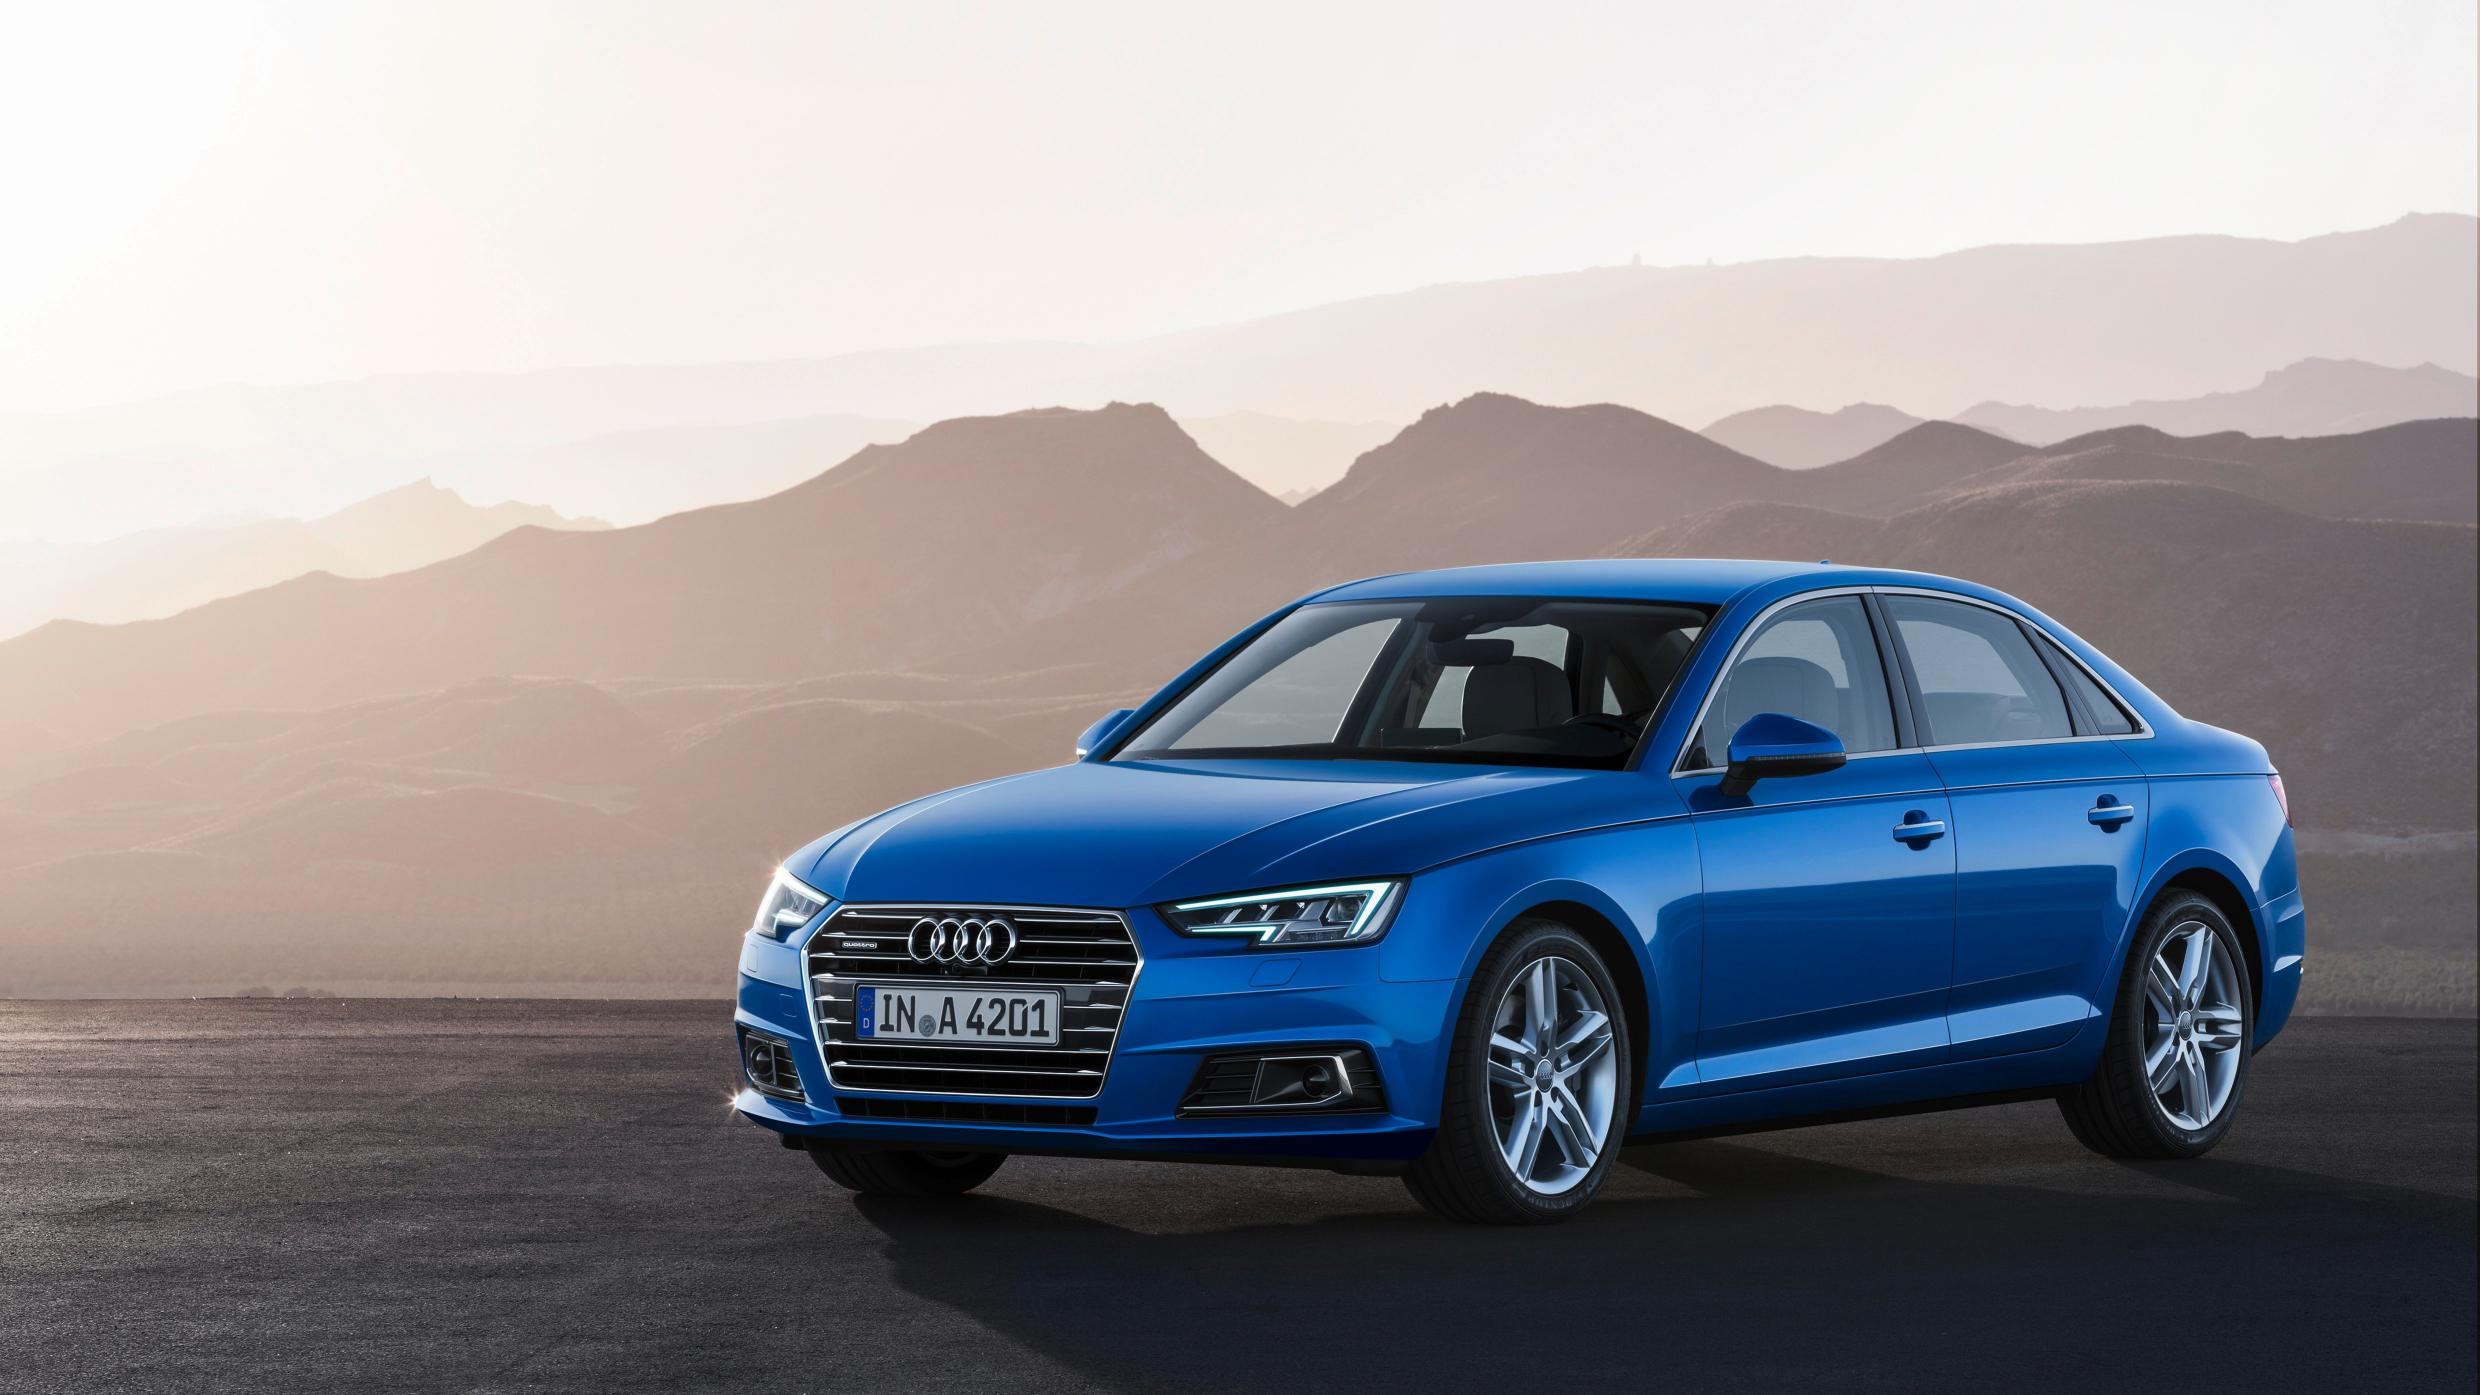

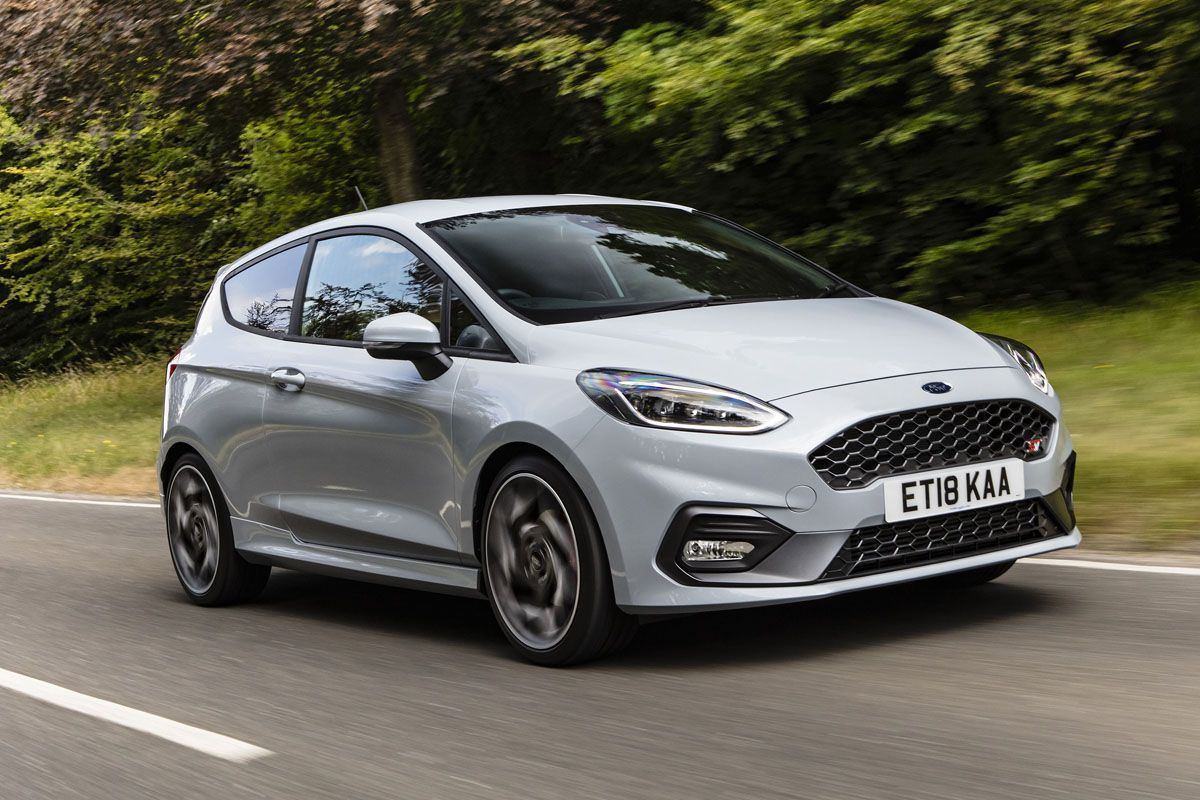

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

In [2]:
df = pd.read_hdf("df.train.new.h5")
print(df.shape)

df.sample(10)

(80129, 10)


,id,price_details,price_value,price_currency,features,seller_name,seller_type,seller_address,breadcrumb,offer_params
25332,25332,"Cena Brutto, Faktura VAT",76 000,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Wrocław, Dolnośląskie, Krzyki","[Osobowe, Audi, A4, Audi A4 B8 (2007-2015)]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ..."
133844,133844,Cena Brutto,23 500,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",POLSERWIS,Dealer,"Ofiar Katynia 32 - 37-450 Stalowa Wola, stalow...","[Osobowe, Renault, Laguna, Renault Laguna III ...","{'Kolor': 'Szary', 'Model pojazdu': 'Laguna', ..."
141494,141494,Cena Brutto,27 999,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",MIASTECZKO SAMOCHODOWE OKĘCIE - PEWNE AUTA Z P...,Dealer,"Al. Krakowska 178 Biuro C - 02-254 Warszawa, ...","[Osobowe, BMW, Seria 3, 320, BMW Seria 3 E90 (...","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ..."
70728,70728,"Cena Brutto, Faktura VAT",139 900,PLN,"[ABS, Elektryczne szyby przednie, Radio fabryc...",CityCar Sp. z o.o.,Dealer,"Dąbrowskiego 26 - 44-100 Gliwice, Śląskie (Pol...","[Osobowe, Ford, Kuga, Ford Kuga II (2012-)]","{'Pojemność skokowa': '2 000 cm3', 'Model poja..."
100045,100045,Cena Brutto,44 900,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Gliwice, Śląskie, Trynek","[Osobowe, Mazda, 6, Mazda 6 II (2007-2013)]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ..."
11375,11375,"Cena Brutto, Do negocjacji, Faktura VAT",18 000,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...","AUTO ,, BUGAJSKI """,Dealer,"BILCZA UL KIELECKA 14 - 26-026 Bilcza, kiele...","[Osobowe, Fiat, Punto Evo]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ..."
129761,129761,"Cena Brutto, Do negocjacji",44 500,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Rumia, wejherowski, Pomorskie","[Osobowe, Subaru, Forester, Subaru Forester II...","{'Pojemność skokowa': '2 000 cm3', 'Model poja..."
125817,125817,Cena Brutto,13 900,PLN,"[ABS, Immobilizer, Radio fabryczne, Kurtyny po...",F.U.H. IKS-TRANS,Dealer,"ul. Wroniecka 28 - 64-560 Ostroróg, szamotulsk...","[Osobowe, Toyota, Yaris, Toyota Yaris II (2005...","{'Pojemność skokowa': '1 000 cm3', 'Model poja..."
36942,36942,"Cena Brutto, Faktura VAT",53 990,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",GRUPA Super Auto,Dealer,"- - 53-413 Wrocław, Dolnośląskie (Polska)","[Osobowe, Citroën, C-Elysée]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ..."
67117,67117,"Cena Brutto, Do negocjacji",16 900,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",Daro Truck,Dealer,"Ełcka 4 - 19-400 Olecko, olecki, Warmińsko-maz...","[Osobowe, Škoda, Octavia, Škoda Octavia II (20...","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ..."


## Checking price column & data cleaning

In [5]:
df['price_value'] = df['price_value'].str.replace(" ", "").str.replace(",", ".").astype(float)
df['price_value']

7         63900.0
10        41900.0
11        17950.0
14        38000.0
16        21900.0
           ...   
160252    22800.0
160253    29900.0
160255    42500.0
160256     4900.0
160257    46000.0
Name: price_value, Length: 80129, dtype: float64

In [6]:
np.percentile(df['price_value'], 99.9)

744524.0960000113

In [7]:
df[ df["price_value"] > 10000000 ]["price_value"]

106447    1.000000e+13
Name: price_value, dtype: float64

In [8]:
df = df[ df.index != 106447 ]

In [9]:
df['price_value'].describe()

count    8.012800e+04
mean     4.834785e+04
std      7.313622e+04
min      5.000000e+02
25%      1.390000e+04
50%      2.560000e+04
75%      5.290000e+04
max      2.545412e+06
Name: price_value, dtype: float64

## Creating manual model version

In [10]:
price_mean = df["price_value"].mean()
df["price_pred"] = price_mean
price_mean

48347.85371056308

In [11]:
df.sample(5)

,id,price_details,price_value,price_currency,features,seller_name,seller_type,seller_address,breadcrumb,offer_params,price_pred
31413,31413,"Cena Brutto, Faktura VAT",46900.0,PLN,"[Poduszki boczne przednie, Centralny zamek, El...",Westmotor Poznań,Dealer,"Obornicka 125, Suchy Las - 62-002 Suchy Las, p...","[Osobowe, Opel, Corsa, Opel Corsa E (2014-)]","{'Pojemność skokowa': '1 398 cm3', 'Model poja...",48347.853711
71411,71411,"Cena Brutto, Do negocjacji",76000.0,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Zabrze, Śląskie","[Osobowe, BMW, Seria 5, 528, BMW Seria 5 F10 (...","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ...",48347.853711
4499,4499,"Cena Netto, Faktura VAT",102000.0,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",Taniej niż w salonie,Dealer,"Wielkotyrnowska 11 - 31-326 Kraków, Krowodrza ...","[Osobowe, BMW, X2]","{'Kolor': 'Czarny', 'Model pojazdu': 'X2', 'Li...",48347.853711
140106,140106,"Cena Brutto, Do negocjacji",23999.0,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",None,Osoba prywatna,"Olkusz, olkuski, Małopolskie","[Osobowe, Mazda, 3, Mazda 3 II (2009-2013)]","{'Bezwypadkowy': 'Tak', 'Liczba miejsc': '5', ...",48347.853711
111471,111471,Cena Brutto,24700.0,PLN,"[ABS, Elektryczne szyby przednie, Poduszka pow...",Dan-Car,Dealer,"Al.Jerozolimskie 452 - 05-800 Pruszków, pruszk...","[Osobowe, Dodge, Caliber]","{'Kolor': 'Bordowy', 'Model pojazdu': 'Caliber...",48347.853711


In [12]:
#error calculation

df["price_diff"] = df["price_pred"] - df["price_value"]

df["price_diff"].abs().mean()

40522.09786542827

In [13]:
mean_absolute_error(df["price_value"], df["price_pred"])

40522.09786540297

In [14]:
df["price_pred"] = df["price_value"].median()
mean_absolute_error(df["price_value"], df["price_pred"])

34552.570975439296

### We've got 40 522 mean error in price prediction and 34 553 median error in price prediction

## ML Model Creation

In [15]:
feats = ["id"]
X = df[feats]
y = df["price_value"]

## Train Model & Error Calculation

In [16]:
model = DummyRegressor(strategy="mean")
model.fit(X, y)
y_pred = model.predict(X)

mean_absolute_error(y, y_pred)

40522.097865402975

In [17]:
model = DummyRegressor(strategy="median")
model.fit(X, y)
y_pred = model.predict(X)

mean_absolute_error(y, y_pred)

34552.570975439296

In [18]:
df_test = pd.read_hdf("df.test.h5")

X_test = df_test[feats]
df_test["price_value"] = model.predict(X_test)

df_test[["id", "price_value"]]

,id,price_value
0,0,25600.0
1,1,25600.0
2,2,25600.0
3,3,25600.0
4,4,25600.0
...,...,...
160245,160245,25600.0
160246,160246,25600.0
160247,160247,25600.0
160251,160251,25600.0


In [20]:
df_test[["id", "price_value"]].to_csv("dummy.csv", index=False)

### Our ML trained model received same results as manual model: 40 522 mean error in price prediction and 34 553 median error in price prediction.